In [146]:
from trout.bg import SkyNew
from datetime import date

### Import data. Only run this once and never modify `df`

In [ ]:
df = SkyNew(list(range(2009, 2021))).df

In [170]:
df['DateOnly'] = df['Date'].apply(lambda x: x.date())

In [169]:
### Helper functions

In [173]:
def pre_filter(df, dates_limit=None):
    if 'DateOnly' not in df.columns:
        df['DateOnly'] = df['Date'].apply(lambda x: x.date())
    
    # Filter by years if necessary
    if dates_limit:
        from_date, to_date = dates_limit
        df = df[df['DateOnly'] > from_date]
        df = df[(df['DateOnly'] > from_date) & (df['DateOnly'] < to_date)]
        
    return df

In [174]:
def normfactor_at_cluster_angle(
    og_df,
    angle,
    normalized_cluster_angle=None, 
    col_name='norm_4px_color_1', 
    should_return=False, 
    ylim=None,
    dates_limit=None
):
    
    df = pre_filter(og_df, dates_limit)
    
    # Filter by cluster angle
    df = df.loc[df['Cluster_Angle_Round'] == angle]
    if normalized_cluster_angle:
        df = df2.loc[df2['Normalized_cluster_angle'] == normalized_cluster_angle]
    
    result = df.filter(items=['DateOnly', col_name]).groupby('DateOnly').median()
    print("Choosing cluster angle", angle)
    result_values = result[col_name].values
    
    if ylim is None:
        ylim = result_values.min(), result_values.max()
    result.plot(style='.', ylim=ylim)
    
    if should_return:
        return df, result

In [166]:
def sky_bg(
    og_df,
    moon_limit=(0.9, 1.1),
    should_return=False, 
    col_name="Median", # Choose between mean and median
    ylim=None,
    dates_limit=None
):
    
    df = pre_filter(og_df, dates_limit)
    
    # Filter by moon phase
    from_phase, to_phase = moon_limit
    df = df.loc[(df['Moon_Phase'] > from_phase) & (df['Moon_Phase'] < to_phase)]
    
    result = df.filter(items=['DateOnly', col_name]).groupby('DateOnly').median()
    result_values = result[col_name].values

    if ylim is None:
        ylim = result_values.min(), result_values.max()
    result.plot(style='.', ylim=ylim)
    
    if should_return:
        return df, result

#### Start playing

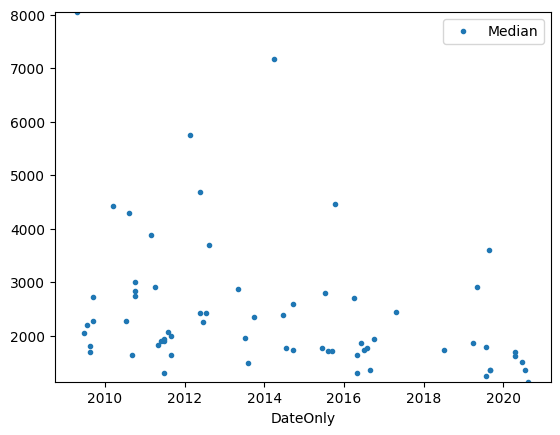

In [171]:
sky_bg(df, moon_limit=(0.9, 1.1))

Choosing cluster angle 25


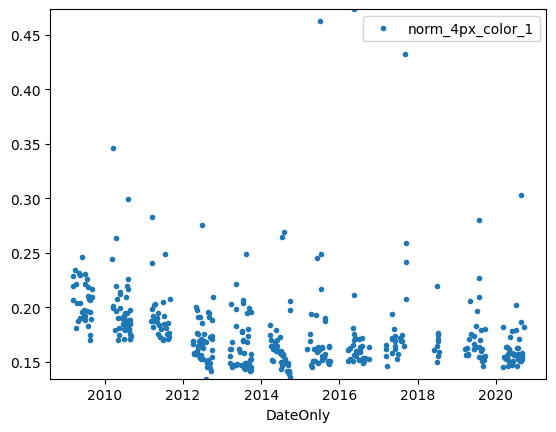

In [175]:
normfactor_at_cluster_angle(df, 25)